In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd 'gdrive'/'My Drive'/'Valital'/'Clustering' 

/content/gdrive/My Drive/Valital/Clustering


In [3]:
ls

Clustering_tf_idf.ipynb          english_label_data.csv
Clustering_using_word2vec.ipynb  english_oneclass_testset.csv
english_category_textset.csv     french_label_data.csv


In [45]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

# import nltk
# from nltk.corpus import stopwords

# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def tnse_projection(content,labels):
  # Load the data and create document vectors
  tfidf  = TfidfVectorizer()

  docs = tfidf.fit_transform(content)
  tags = labels

  # Create the visualizer and draw the vectors
  tsne = TSNEVisualizer()
  tsne.fit(docs, tags)
  tsne.poof()

In [0]:
def Kmean_clustering(k,content,stopwords):
  vectorizer = TfidfVectorizer(stop_words = stopwords)
  X = vectorizer.fit_transform(content)
  
  true_k = k
  model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
  model.fit(X)

  order_centroids = model.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names()

  for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
      print(' %s' % terms[ind])




## English

In [0]:
df_english= pd.read_csv('english_label_data.csv')

In [37]:
df_english.columns

Index(['url', 'content', 'human_content_category_1',
       'human_content_oneclass_category_1'],
      dtype='object')

In [0]:
k = 6
content = df_english['content']

In [52]:
Kmean_clustering(k,content,en_stop)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Cluster 0:
 fraud
 mr
 said
 company
 bank
 securities
 million
 investors
 financial
 prosecutors
 federal
 court
 money
 charges
 credit
 case
 guilty
 companies
 mortgage
 billion
Cluster 1:
 said
 people
 violence
 police
 new
 drug
 year
 like
 world
 time
 city
 school
 years
 gun
 advertisement
 mr
 health
 according
 use
 addiction
Cluster 2:
 women
 sexual
 said
 harassment
 violence
 domestic
 men
 ms
 kavanaugh
 assault
 victims
 allegations
 woman
 abuse
 female
 ford
 law
 senate
 new
 court
Cluster 3:
 mr
 said
 ms
 harassment
 sexual
 fox
 weinstein
 advertisement
 women
 cain
 allegations
 company
 news
 reilly
 ailes
 lopez
 lawyer
 new
 office
 case
Cluster 4:
 trump
 president
 said
 white
 house
 donald
 administration
 people
 opioid
 campaign
 democrats
 new
 mr
 states
 drug
 republican
 country
 american
 cnn
 obama
Cluster 5:
 court
 rights
 voter
 law
 said
 discrimination
 voting
 state
 sex
 supreme
 election
 vote
 religious
 justice
 transgender
 president

## English Categorical

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

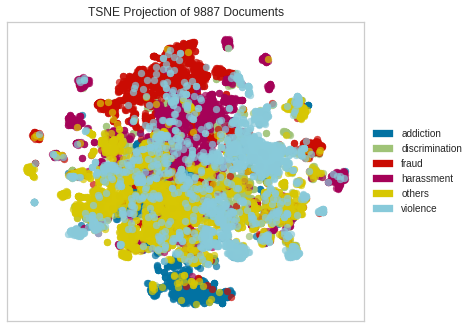

In [17]:
  content = df_english['content'].values
  labels = df_english['human_content_category_1'].values
  tnse_projection(content,labels)

## English One Class

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


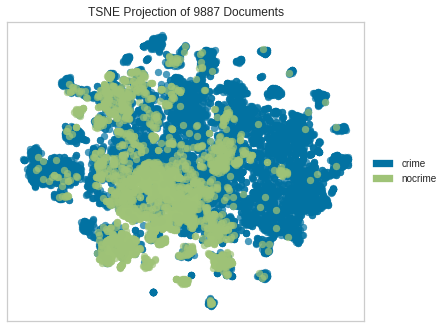

In [14]:
# For One Class
content = df_english['content'].values
labels = df_english['human_content_oneclass_category_1'].values
tnse_projection(content,labels)

## French

In [0]:
df_french= pd.read_csv('french_label_data.csv')

In [41]:
df_french.columns

Index(['url', 'content', 'human_content_category_1',
       'human_content_oneclass_category_1'],
      dtype='object')

In [0]:
k = 2
content = df_french['content']

In [57]:
Kmean_clustering(k,content,fr_stop)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Cluster 0:
 qu
 sport
 ans
 monde
 jeux
 faire
 équipe
 québec
 montréal
 joueurs
 temps
 saison
 sports
 fois
 vie
 hockey
 match
 année
 jeunes
 canada
Cluster 1:
 qu
 ministre
 ans
 femmes
 police
 québec
 enquête
 gouvernement
 personnes
 hier
 président
 pays
 harcèlement
 victimes
 loi
 policiers
 justice
 canada
 cour
 abus


## French Categorical

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

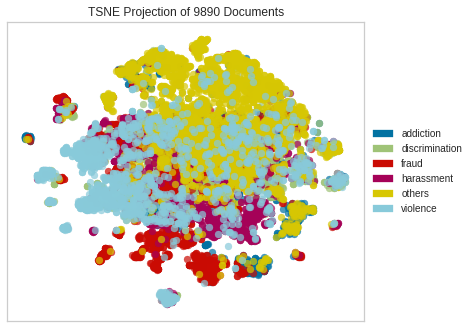

In [54]:
content = df_french['content'].values
labels = df_french['human_content_category_1'].values
tnse_projection(content,labels)

## French One Class

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


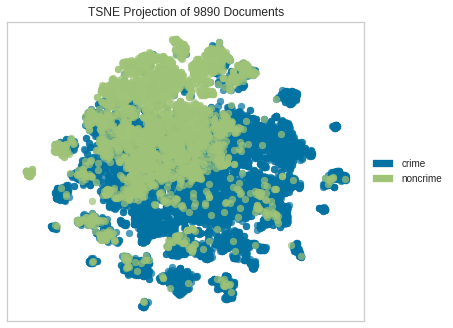

In [55]:
content = df_french['content'].values
labels = df_french['human_content_oneclass_category_1'].values
tnse_projection(content,labels)